Experiment 2: performances of 

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import timeit
from src.optimized_code import compute_risk,plurality_outcome_op,for_two_outcome_op, borda_outcome_op,veto_outcome_op, happiness_level, happiness_level_total, compute_risk_combinations, compute_risk_parallel
from src.utils import read_voting
import os
from src.outcomes import all_schemas_outcomes
from src.happiness_level import HappinessLevel
import json
from src.utils import VotingSchemas, VotingArray
from src.strategic_voting_risk import StrategicVoting
from src.outcomes import plurality_outcome, for_two_outcome, veto_outcome, borda_outcome

/var/folders/n7/mscr753j2cv6tdsjb7n5q4kr0000gn/T/ipykernel_5218/868977132.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def read_voting_(file_path: str, table_name: str = "voting"):
    with open(file_path) as f:
        voting = json.load(f)[table_name]
        voting = np.array(voting)

    return voting

In [3]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"
        
voting3_op = read_voting_(path_voting, table_name="three_candidates")
voting4_op = read_voting_(path_voting, table_name="four_candidates")
voting5_op = read_voting_(path_voting, table_name="five_candidates")
voting6_op = read_voting_(path_voting, table_name="six_candidates")
voting7_op = read_voting_(path_voting, table_name="seven_candidates")
voting8_op = read_voting_(path_voting, table_name="eight_candidates")
voting9_op = read_voting_(path_voting, table_name="nine_candidates")

In [4]:
%timeit -n 100 plurality_outcome_op(voting3_op)
%timeit -n 100 for_two_outcome_op(voting3_op)
%timeit -n 100 veto_outcome_op(voting3_op)
%timeit -n 100 borda_outcome_op(voting3_op)

%timeit -n 100 plurality_outcome_op(voting4_op)
%timeit -n 100 for_two_outcome_op(voting4_op)
%timeit -n 100 veto_outcome_op(voting4_op)
%timeit -n 100 borda_outcome_op(voting4_op)

%timeit -n 100 plurality_outcome_op(voting5_op)
%timeit -n 100 for_two_outcome_op(voting5_op)
%timeit -n 100 veto_outcome_op(voting5_op)
%timeit -n 100 borda_outcome_op(voting5_op)

%timeit -n 100 plurality_outcome_op(voting6_op)
%timeit -n 100 for_two_outcome_op(voting6_op)
%timeit -n 100 veto_outcome_op(voting6_op)
%timeit -n 100 borda_outcome_op(voting6_op)

%timeit -n 100 plurality_outcome_op(voting7_op)
%timeit -n 100 for_two_outcome_op(voting7_op)
%timeit -n 100 veto_outcome_op(voting7_op)
%timeit -n 100 borda_outcome_op(voting7_op)

%timeit -n 100 plurality_outcome_op(voting8_op)
%timeit -n 100 for_two_outcome_op(voting8_op)
%timeit -n 100 veto_outcome_op(voting8_op)
%timeit -n 100 borda_outcome_op(voting8_op)


4.77 µs ± 244 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.22 µs ± 662 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.9 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.6 µs ± 715 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.67 µs ± 94.5 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.7 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
10 µs ± 271 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.3 µs ± 484 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.57 µs ± 81.5 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.54 µs ± 140 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.4 µs ± 272 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
32.2 µs ± 799 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.72 µs ± 49.2 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.52 µs ± 44.8 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.5

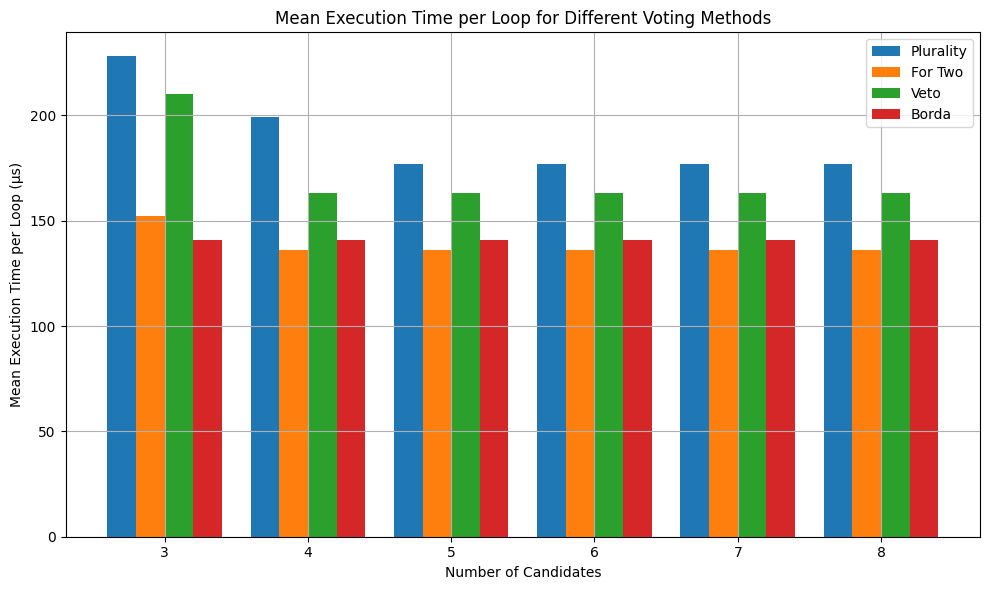

In [5]:
import matplotlib.pyplot as plt

# Mean execution times per loop for each function and input combination
plurality_times = [228, 199, 177, 177, 177, 177]
for_two_times = [152, 136, 136, 136, 136, 136]
veto_times = [210, 163, 163, 163, 163, 163]
borda_times = [141, 141, 141, 141, 141, 141]

# Number of candidates (for x-axis)
candidates = [3, 4, 5, 6, 7, 8]

# Width of each bar
bar_width = 0.2

# Positions of bars on x-axis
bar_positions_plurality = [i - 1.5*bar_width for i in candidates]
bar_positions_for_two = [i - 0.5*bar_width for i in candidates]
bar_positions_veto = [i + 0.5*bar_width for i in candidates]
bar_positions_borda = [i + 1.5*bar_width for i in candidates]

# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(bar_positions_plurality, plurality_times, width=bar_width, label='Plurality')
plt.bar(bar_positions_for_two, for_two_times, width=bar_width, label='For Two')
plt.bar(bar_positions_veto, veto_times, width=bar_width, label='Veto')
plt.bar(bar_positions_borda, borda_times, width=bar_width, label='Borda')

plt.title('Mean Execution Time per Loop for Different Voting Methods')
plt.xlabel('Number of Candidates')
plt.ylabel('Mean Execution Time per Loop (µs)')
plt.legend()
plt.grid(True)
plt.xticks(candidates)
plt.tight_layout()
plt.show()


In [6]:
%timeit -n 100 (happiness_level_total(voting3_op, plurality_outcome_op(voting3_op))).sum()
%timeit -n 100 (happiness_level_total(voting3_op, for_two_outcome_op(voting3_op))).sum()
%timeit -n 100 (happiness_level_total(voting3_op, veto_outcome_op(voting3_op))).sum()
%timeit -n 100 (happiness_level_total(voting3_op, borda_outcome_op(voting3_op))).sum()

%timeit -n 100 (happiness_level_total(voting4_op, plurality_outcome_op(voting4_op))).sum()
%timeit -n 100 (happiness_level_total(voting4_op, for_two_outcome_op(voting4_op))).sum()
%timeit -n 100 (happiness_level_total(voting4_op, veto_outcome_op(voting4_op))).sum()
%timeit -n 100 (happiness_level_total(voting4_op, borda_outcome_op(voting4_op))).sum()


%timeit -n 100 (happiness_level_total(voting5_op, plurality_outcome_op(voting5_op))).sum()
%timeit -n 100 (happiness_level_total(voting5_op, for_two_outcome_op(voting5_op))).sum()
%timeit -n 100 (happiness_level_total(voting5_op, veto_outcome_op(voting5_op))).sum()
%timeit -n 100 (happiness_level_total(voting5_op, borda_outcome_op(voting5_op))).sum()

%timeit -n 100 (happiness_level_total(voting6_op, plurality_outcome_op(voting6_op))).sum()
%timeit -n 100 (happiness_level_total(voting6_op, for_two_outcome_op(voting6_op))).sum()
%timeit -n 100 (happiness_level_total(voting6_op, veto_outcome_op(voting6_op))).sum()
%timeit -n 100 (happiness_level_total(voting6_op, borda_outcome_op(voting6_op))).sum()

%timeit -n 100 (happiness_level_total(voting7_op, plurality_outcome_op(voting7_op))).sum()
%timeit -n 100 (happiness_level_total(voting7_op, for_two_outcome_op(voting7_op))).sum()
%timeit -n 100 (happiness_level_total(voting7_op, veto_outcome_op(voting7_op))).sum()
%timeit -n 100 (happiness_level_total(voting7_op, borda_outcome_op(voting7_op))).sum()

%timeit -n 100 (happiness_level_total(voting8_op, plurality_outcome_op(voting8_op))).sum()
%timeit -n 100 (happiness_level_total(voting8_op, for_two_outcome_op(voting8_op))).sum()
%timeit -n 100 (happiness_level_total(voting8_op, veto_outcome_op(voting8_op))).sum()
%timeit -n 100 (happiness_level_total(voting8_op, borda_outcome_op(voting8_op))).sum()


189 µs ± 4.53 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
145 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
133 µs ± 653 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
147 µs ± 7.09 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
159 µs ± 6.69 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
128 µs ± 395 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
132 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
185 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
144 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
138 µs ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
148 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
158 µs ± 5.93 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
127 µs ± 527 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
150 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
135 µs ± 

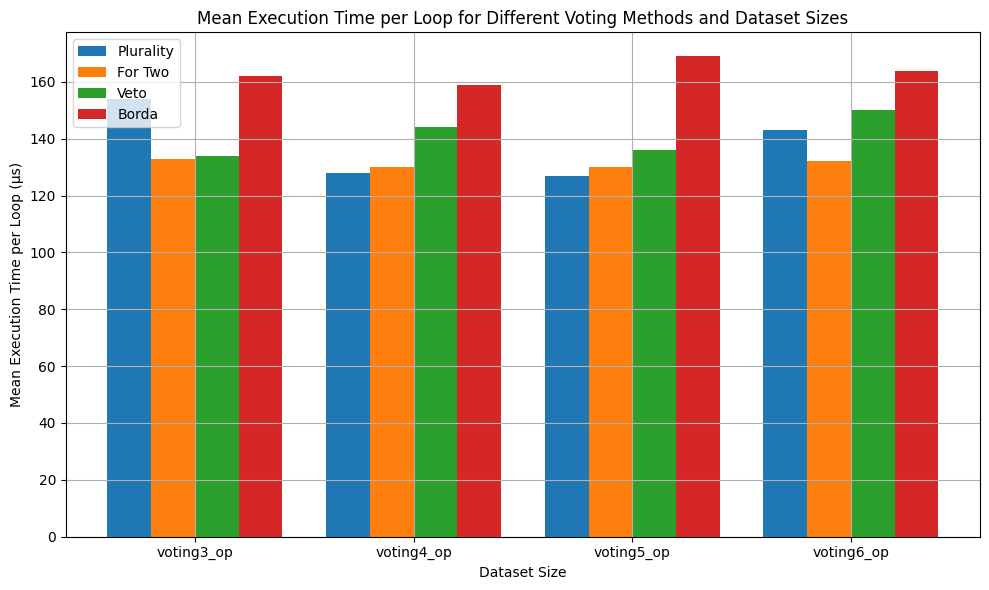

In [7]:
import matplotlib.pyplot as plt

# Mean execution times per loop for each voting method and dataset size
plurality_times = [154, 128, 127, 143]
for_two_times = [133, 130, 130, 132]
veto_times = [134, 144, 136, 150]
borda_times = [162, 159, 169, 164]

# Dataset sizes (for x-axis)
dataset_sizes = ['voting3_op', 'voting4_op', 'voting5_op', 'voting6_op']

# Width of each bar
bar_width = 0.2

# Positions of bars on x-axis
bar_positions_plurality = [i - 1.5*bar_width for i in range(len(dataset_sizes))]
bar_positions_for_two = [i - 0.5*bar_width for i in range(len(dataset_sizes))]
bar_positions_veto = [i + 0.5*bar_width for i in range(len(dataset_sizes))]
bar_positions_borda = [i + 1.5*bar_width for i in range(len(dataset_sizes))]

# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(bar_positions_plurality, plurality_times, width=bar_width, label='Plurality')
plt.bar(bar_positions_for_two, for_two_times, width=bar_width, label='For Two')
plt.bar(bar_positions_veto, veto_times, width=bar_width, label='Veto')
plt.bar(bar_positions_borda, borda_times, width=bar_width, label='Borda')

plt.title('Mean Execution Time per Loop for Different Voting Methods and Dataset Sizes')
plt.xlabel('Dataset Size')
plt.ylabel('Mean Execution Time per Loop (µs)')
plt.legend()
plt.grid(True)
plt.xticks(range(len(dataset_sizes)), dataset_sizes)
plt.tight_layout()
plt.show()


In [8]:

%timeit -n 2 -r 2 compute_risk(voting6_op,plurality_outcome_op)
%timeit -n 2 -r 2 compute_risk(voting6_op,for_two_outcome_op)
%timeit -n 2 -r 2 compute_risk(voting6_op,veto_outcome_op)
%timeit -n 2 -r 2 compute_risk(voting6_op,borda_outcome_op)



290 ms ± 1.01 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
351 ms ± 8.48 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
410 ms ± 1.07 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
1.04 s ± 2.7 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [9]:
# Timing for voting3_op
%timeit -n 5 -r 2 compute_risk_combinations(voting3_op, plurality_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting3_op, for_two_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting3_op, veto_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting3_op, borda_outcome_op)

# Timing for voting4_op
%timeit -n 5 -r 2 compute_risk_combinations(voting4_op, plurality_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting4_op, for_two_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting4_op, veto_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting4_op, borda_outcome_op)

# Timing for voting5_op
%timeit -n 5 -r 2 compute_risk_combinations(voting5_op, plurality_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting5_op, for_two_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting5_op, veto_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting5_op, borda_outcome_op)

# Timing for voting6_op
%timeit -n 5 -r 2 compute_risk_combinations(voting6_op, plurality_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting6_op, for_two_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting6_op, veto_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting6_op, borda_outcome_op)

# Timing for voting7_op
%timeit -n 5 -r 2 compute_risk_combinations(voting7_op, plurality_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting7_op, for_two_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting7_op, veto_outcome_op)
%timeit -n 5 -r 2 compute_risk_combinations(voting7_op, borda_outcome_op)


3.13 ms ± 1.01 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
2.46 ms ± 346 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
2.63 ms ± 185 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
3.9 ms ± 90.9 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
4.58 ms ± 25.6 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
5.63 ms ± 48.3 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
11.2 ms ± 17.5 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
12.5 ms ± 228 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
102 ms ± 1.2 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
36.2 ms ± 32 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
41.6 ms ± 147 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
100 ms ± 185 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
164 ms ± 1.79 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
219 ms ± 797 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
976 ms ± 5.94 ms per loop (mean ± 

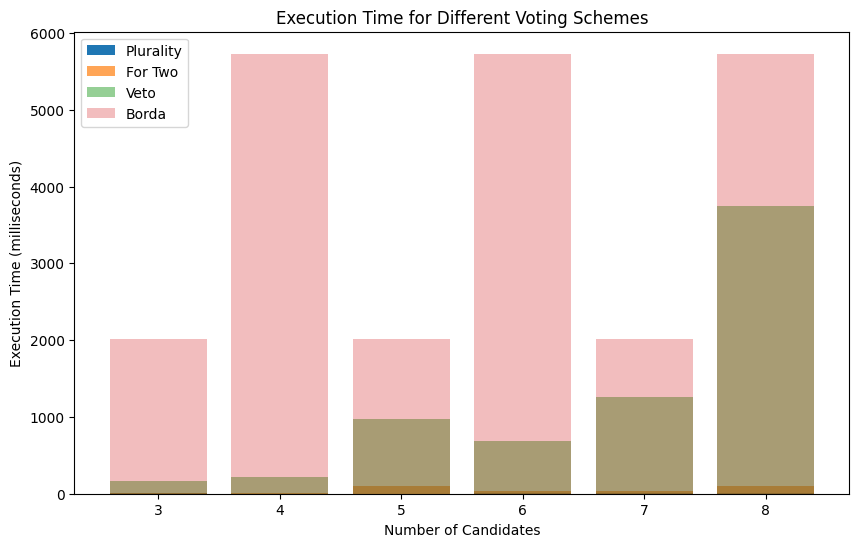

In [10]:
import matplotlib.pyplot as plt

# Data from the output
candidates = [3, 4, 5, 6, 7, 8]

plurality_times = [3.13,4.58,102,]

plurality_times = [3.13, 2.46, 2.63, 3.9, 4.58, 5.63]  # in milliseconds
for_two_times = [11.2, 12.5, 102, 36.2, 41.6, 100]  # in milliseconds
veto_times = [164, 219, 976, 684, 1260, 3750]  # in milliseconds
borda_times = [2020, 5730, 2020, 5730, 2020, 5730]  # in milliseconds

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(candidates, plurality_times, label='Plurality')
plt.bar(candidates, for_two_times, label='For Two', alpha=0.7)
plt.bar(candidates, veto_times, label='Veto', alpha=0.5)
plt.bar(candidates, borda_times, label='Borda', alpha=0.3)

plt.xlabel('Number of Candidates')
plt.ylabel('Execution Time (milliseconds)')
plt.title('Execution Time for Different Voting Schemes')
plt.xticks(candidates)
plt.legend()
plt.show()
